<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/08-NLP/New_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install notebook --upgrade
!pip install ipywidgets

Requirement already up-to-date: notebook in /usr/local/lib/python3.6/dist-packages (6.2.0)


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [4]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
df=pd.read_json('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/News_Category_Dataset_v2.zip?raw=true',
               compression='zip',lines=True)

In [6]:
df.shape

(200853, 6)

In [7]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [8]:
df['category'].describe()

count       200853
unique          41
top       POLITICS
freq         32739
Name: category, dtype: object

In [9]:
df['category'].value_counts(ascending=False).head(10)

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
Name: category, dtype: int64

In [10]:
#I am taking top 10 categories based on count
df_top_10_category = df[df.category.isin(df.category.value_counts(ascending=False).head(10).index)]

In [11]:
df_top_10_category['news'] = df_top_10_category['headline'] + ' ' + df_top_10_category['short_description']

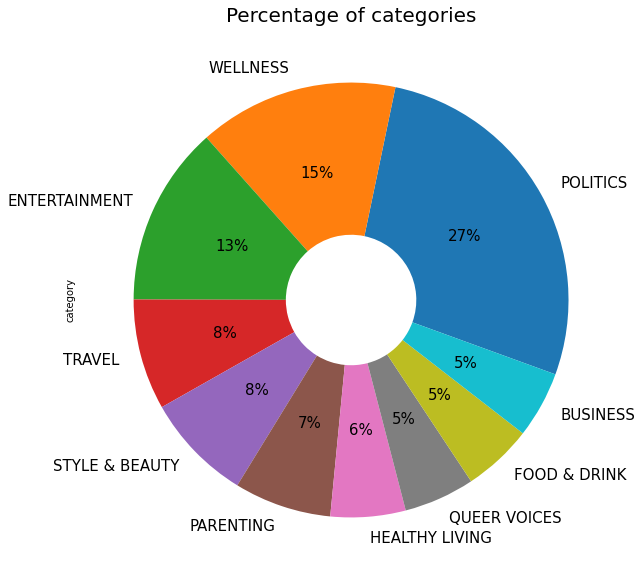

In [12]:
plt.figure(figsize=(30,10))
plt.title('Percentage of categories', fontsize=20)
df_top_10_category.category.value_counts(ascending=False).plot(kind='pie', labels=list(df_top_10_category['category'].value_counts(ascending=False).index),
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


In [13]:
print(df_top_10_category.isnull().sum())

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
news                 0
dtype: int64


In [14]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def plot_top_n_words(corpus,title=None,n=None):
    common_words = get_top_n_words(corpus,n)
    df4 = pd.DataFrame(common_words, columns = ['news' , 'count'])
    df4.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title=title)

In [15]:
plot_top_n_words(df_top_10_category['news'],title='Top 10 words in news',n=10)

In [16]:
plot_top_n_words(df_top_10_category['news'],title='Top 10 words in news',n=10)

In [17]:
plot_top_n_words(df_top_10_category[df_top_10_category['category'] == 'POLITICS']['news'],title='Top 10 words in news for politics',n=10)

In [18]:
plot_top_n_words(df_top_10_category[df_top_10_category['category'] == 'WELLNESS']['news'],title='Top 10 words in news for wellness',n=10)

In [19]:
plot_top_n_words(df_top_10_category[df_top_10_category['category'] == 'ENTERTAINMENT']['news'],title='Top 10 words in news for entertaimment',n=10)

In [20]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def plot_top_n_bigram(corpus,title=None,n=None):
    common_words = get_top_n_bigram(corpus,n)
    df4 = pd.DataFrame(common_words, columns = ['news' , 'count'])
    df4.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title=title)

In [21]:
plot_top_n_bigram(df_top_10_category['news'],title='Top 10 bigrams in news',n=10)

In [22]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'POLITICS']['news'],title='Top 10 bigrams in news for politics',n=10)

In [23]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'ENTERTAINMENT']['news'],title='Top 10 bigrams in news for entertainment',n=10)


In [24]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'TRAVEL']['news'],title='Top 10 bigrams in news for travel',n=10)


In [25]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'STYLE & BEAUTY']['news'],title='Top 10 bigrams in news for style & beauty',n=10)


In [26]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'PARENTING']['news'],title='Top 10 bigrams in news for parenting',n=10)


In [27]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'HEALTHY LIVING']['news'],title='Top 10 bigrams in news for healthy living',n=10)


In [28]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'QUEER VOICES']['news'],title='Top 10 bigrams in news for queer voices',n=10)


In [29]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'FOOD & DRINK']['news'],title='Top 10 bigrams in news for food & drink',n=10)


In [30]:
plot_top_n_bigram(df_top_10_category[df_top_10_category['category'] == 'BUSINESS']['news'],title='Top 10 bigrams in news for business',n=10)


In [31]:
#split the train and test dataset
X_train,X_test,y_train,y_test = train_test_split(df_top_10_category['news'],df_top_10_category['category'],test_size = 0.1,random_state=2)


In [32]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [33]:
model.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [35]:
def classifier_scores(y_train,y_test, pred_train, pred_test):
    
    print()
    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))    
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print()
    print("Recall score on train data: ", recall_score(y_train,pred_train, average='macro'))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print()
    
    print("Precision score on train data: ",precision_score(y_train,pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print()
    print("F1 score on train data: ",f1_score(y_train,pred_train, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))


In [36]:
classifier_scores(y_train,y_test, pred_train, pred_test)



Train data accuracy score:  0.6894923477182034
Test data accuracy score:  0.6541121573202233

Recall score on train data:  0.5121028391093151
Recall score on test data:  0.47182403577693394

Precision score on train data:  0.8686980372083786
Precision score on test data:  0.8502148210379298

F1 score on train data:  0.5299057459534259
F1 score on test data:  0.48410456869818885


In [37]:
  import nltk
  nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
n_records = len(df_top_10_category)
for i in range(n_records):
    text = df_top_10_category.iloc[i,1]
    
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()
    
    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)
    
    if i%1000==0:
        print(i,end='->')


0->1000->2000->3000->4000->5000->6000->7000->8000->9000->10000->11000->12000->13000->14000->15000->16000->17000->18000->19000->20000->21000->22000->23000->24000->25000->26000->27000->28000->29000->30000->31000->32000->33000->34000->35000->36000->37000->38000->39000->40000->41000->42000->43000->44000->45000->46000->47000->48000->49000->50000->51000->52000->53000->54000->55000->56000->57000->58000->59000->60000->61000->62000->63000->64000->65000->66000->67000->68000->69000->70000->71000->72000->73000->74000->75000->76000->77000->78000->79000->80000->81000->82000->83000->84000->85000->86000->87000->88000->89000->90000->91000->92000->93000->94000->95000->96000->97000->98000->99000->100000->101000->102000->103000->104000->105000->106000->107000->108000->109000->110000->111000->112000->113000->114000->115000->116000->117000->118000->

In [ ]:
df_top_10_category['news_corpus'] = corpus

In [ ]:
#split the train and test dataset
X_train,X_test,y_train,y_test = train_test_split(df_top_10_category['news_corpus'],df_top_10_category['category'],test_size = 0.1,random_state=2)

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [ ]:
model.fit(X_train, y_train)


In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [ ]:
classifier_scores(y_train,y_test, pred_train, pred_test)


In [ ]:
df_test = pd.DataFrame({'news':X_test, 'predicted_category':list(pred_test)})
df_test['actual'] = y_test


In [ ]:
df_test
